In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

In [8]:
data=pd.read_csv("C:/Users/rajan/Downloads/NextLeap/Wholesale_Customer_1.csv")

In [ ]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
data['Total'] = data['Fresh']+data['Milk']+data['Grocery']+data['Frozen']+data['Detergents_Paper']+data['Delicatessen']

In [6]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


Q1. Which region and which chanel seems to spend more?

In [8]:
a=data.groupby(['Region']).sum()

In [9]:
a.head()

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,,
Lisbon,18095,HotelRetailHotelHotelRetailRetailHotelHotelHot...,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,RetailHotelRetailHotelRetailRetailHotelRetailR...,464721,239144,433274,190132,173311,54506,1555088
Other,64026,RetailRetailRetailHotelRetailRetailRetailRetai...,3960577,1888759,2495251,930492,890410,512110,10677599


Region wise spend


,Region,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,%Total
0,Lisbon,18095,HotelRetailHotelHotelRetailRetailHotelHotelHot...,854833,422454,570037,231026,204136,104327,2386813,16.326229
1,Oporto,14899,RetailHotelRetailHotelRetailRetailHotelRetailR...,464721,239144,433274,190132,173311,54506,1555088,10.637081
2,Other,64026,RetailRetailRetailHotelRetailRetailRetailRetai...,3960577,1888759,2495251,930492,890410,512110,10677599,73.036691


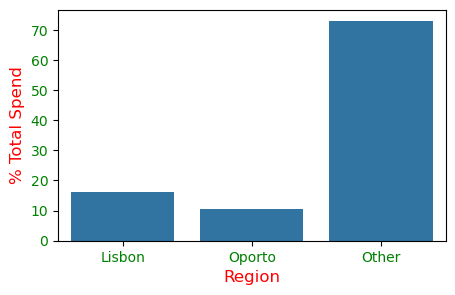

In [10]:
df_reg=data.groupby(['Region']).sum()
df_reg.reset_index(inplace=True)
print('Region wise spend')
df_reg['%Total']=df_reg['Total']/df_reg['Total'].sum()*100
display(df_reg)
print('')

plt.figure(figsize=(5,3))
sns.barplot(y=df_reg['%Total'],x=df_reg['Region'],estimator=sum)
plt.xticks(fontsize=10,color='green')
plt.yticks(fontsize=10,color='green')
plt.ylabel('% Total Spend',fontsize=12,color='red')
plt.xlabel('Region',fontsize=12,color='red')
plt.show()

Channel wise spend


,Channel,Buyer/Spender,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,%Total
0,Hotel,71034,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,4015717,1028614,1180717,1116979,235587,421955,7999569,54.718486
1,Retail,25986,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,1264414,1521743,2317845,234671,1032270,248988,6619931,45.281514


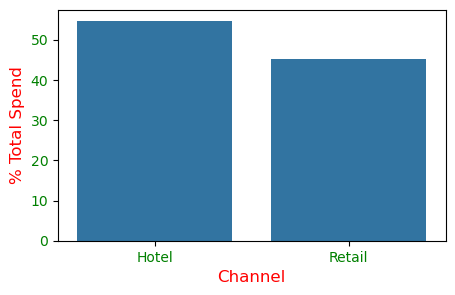

In [11]:
df_ch=data.groupby(['Channel']).sum()
df_ch.reset_index(inplace=True)
print('Channel wise spend')
df_ch['%Total']=df_ch['Total']/df_ch['Total'].sum()*100
display(df_ch)
print('')


plt.figure(figsize=(5,3))
sns.barplot(y=df_ch['%Total'],x=df_ch['Channel'],estimator=sum)
plt.xticks(fontsize=10,color='green')
plt.yticks(fontsize=10,color='green')
plt.ylabel('% Total Spend',fontsize=12,color='red')
plt.xlabel('Channel',fontsize=12,color='red')
plt.show()

Q2.There Are six varities of items are considered, do all varities shows smiliar behaviour across region and channel?

In [13]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [17]:
df_ch2=data[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Channel')

In [19]:
df_ch2.describe().T

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

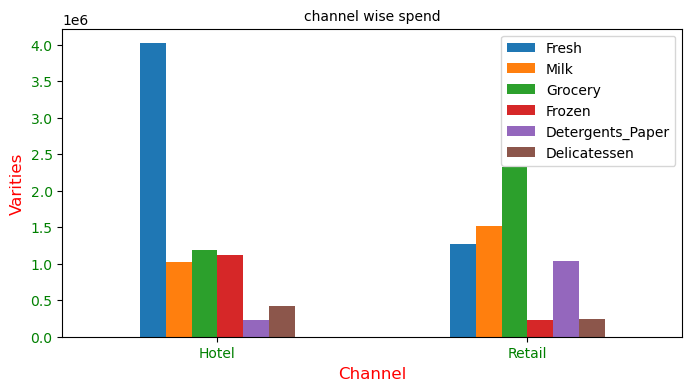

In [65]:
axis=df_ch[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].plot(
    kind='bar',
    stacked=False,
    figsize=(8,4),
    rot=0
)
plt.xlabel('Channel',fontsize=12,color='red')
plt.ylabel('Varities',fontsize=12,color='red')
plt.xticks(fontsize=10,color='green')
plt.yticks(fontsize=10,color='green')
axis.set_xticklabels(df_ch['Channel'])
plt.title('channel wise spend',fontsize=10)
plt.show()

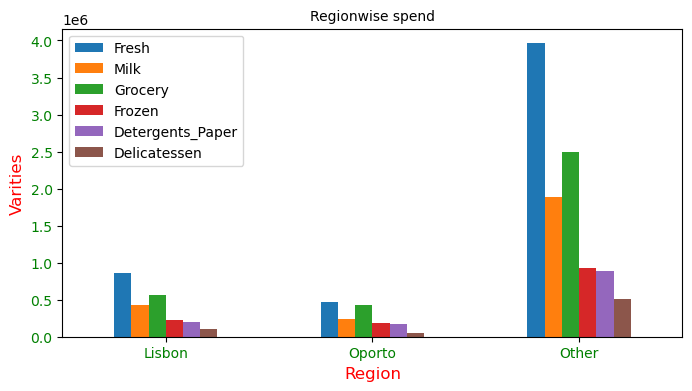

In [73]:
axis=df_reg[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].plot(
    kind='bar',
    stacked=False,
    figsize=(8,4),
    rot=0
)
plt.xlabel('Region',fontsize=12,color='red')
plt.ylabel('Varities',fontsize=12,color='red')
plt.xticks(fontsize=10,color='green')
plt.yticks(fontsize=10,color='green')
axis.set_xticklabels(df_reg['Region'])
plt.title('Regionwise spend',fontsize=10)
plt.show()

Q3. Are there any outliers in the data

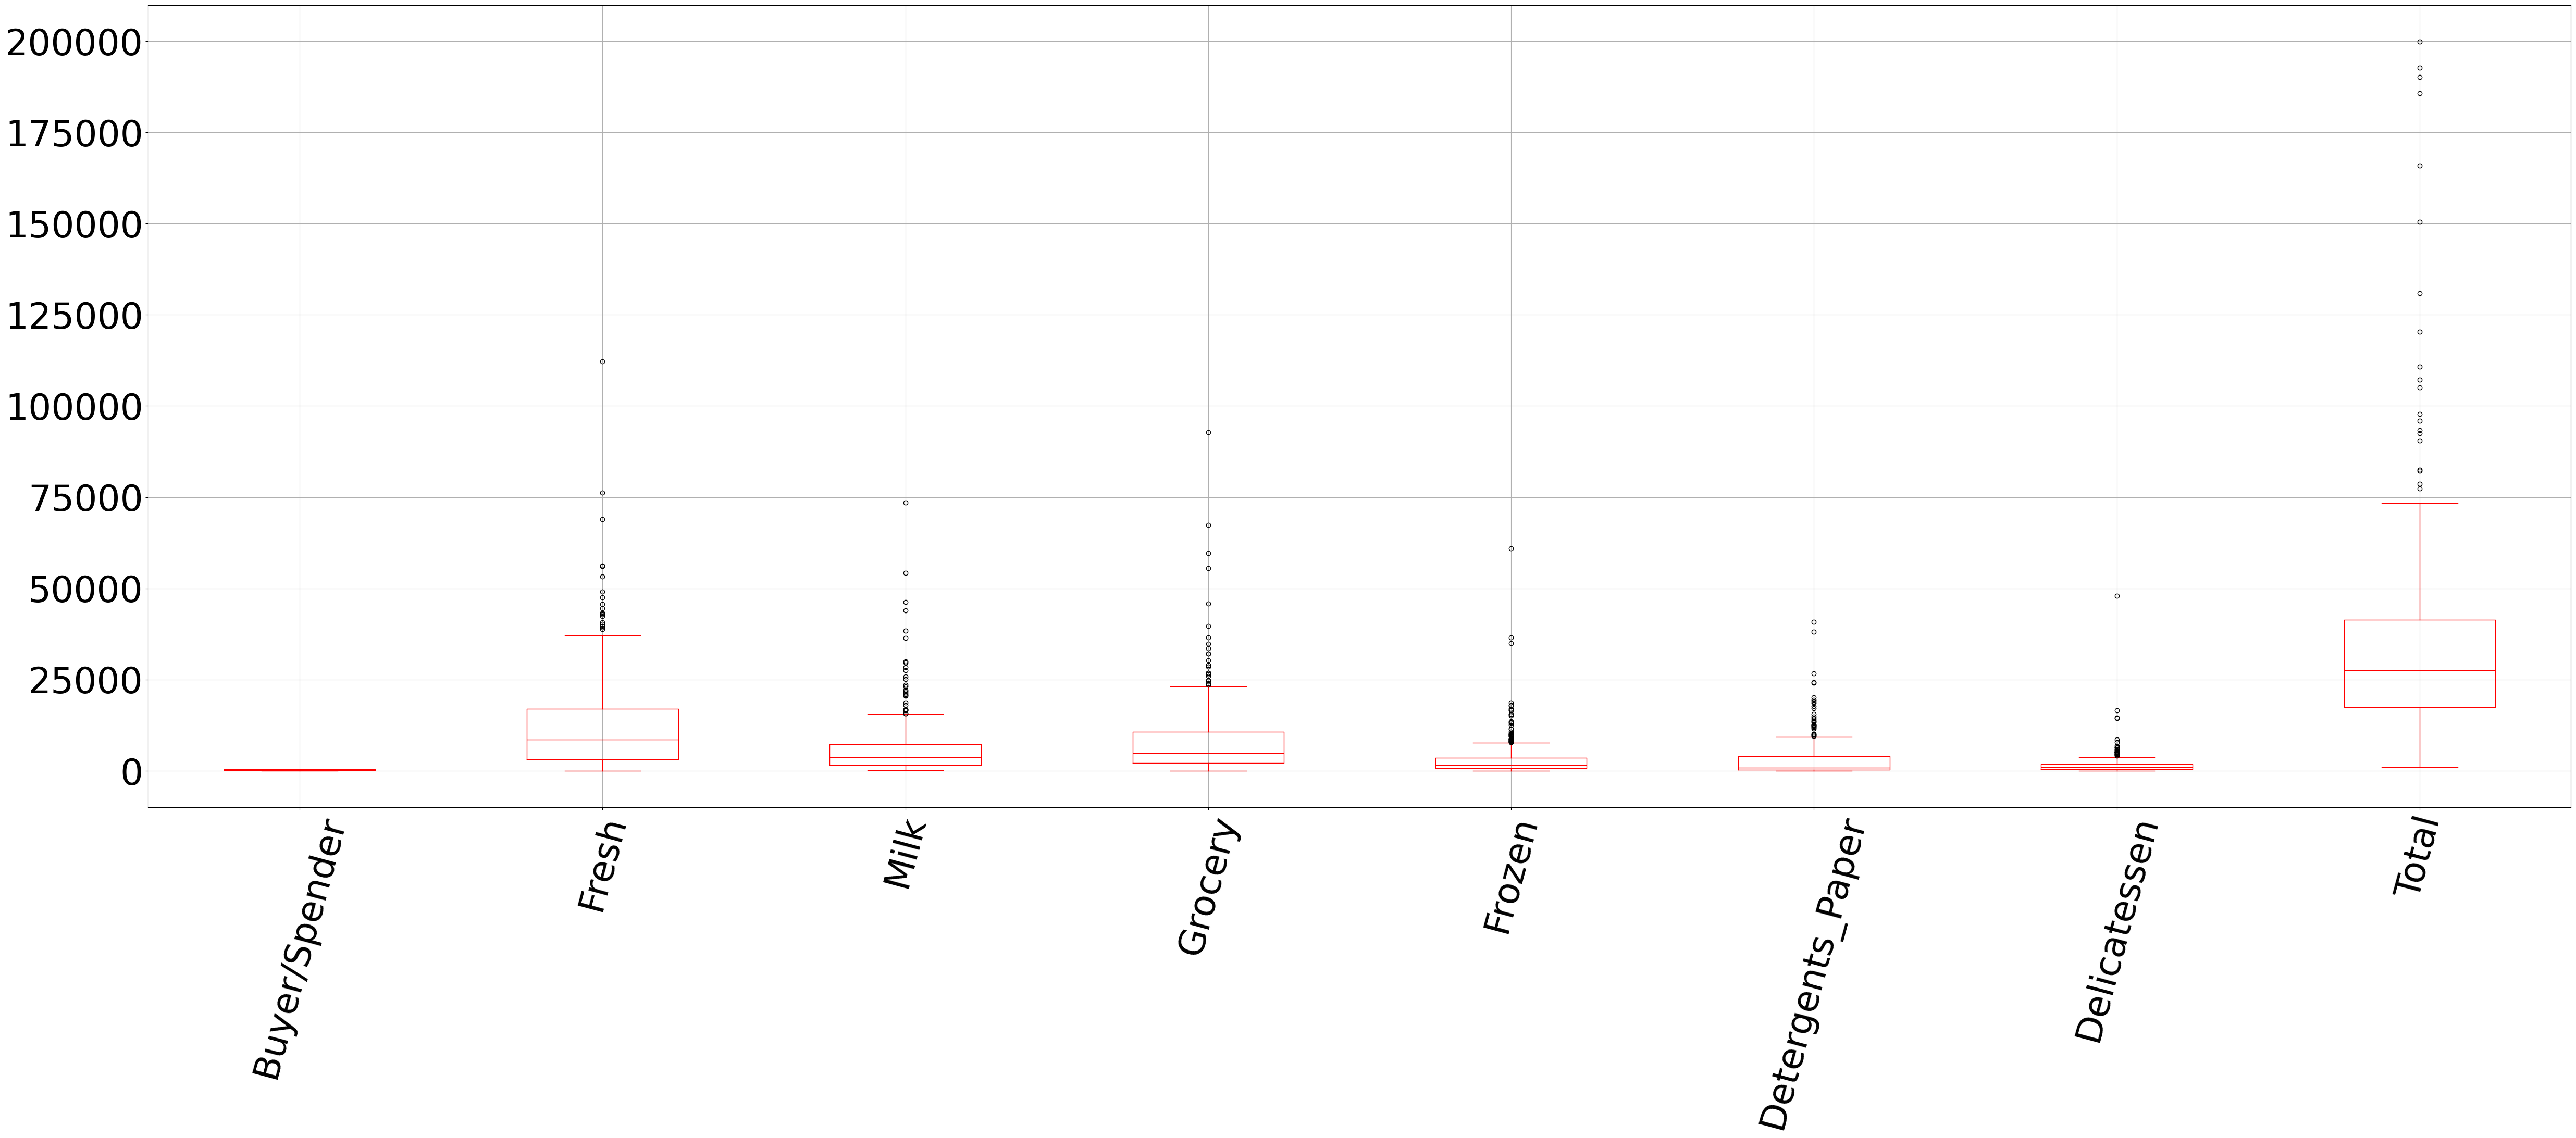

 
All the values have outlier
lets us plot one by one to get more visibility


In [78]:
plt.figure(figsize=(60,20))
data.boxplot(rot=75,color='red')
plt.xticks(fontsize=50,color='black')
plt.yticks(fontsize=50,color='black')
plt.show()
print(" ")
print('All the values have outlier''\n''lets us plot one by one to get more visibility')

--All the variables have outliers
Lets us plot one by one to get more visibilty

In [ ]:
#IQR - Inter Quartile Range

In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


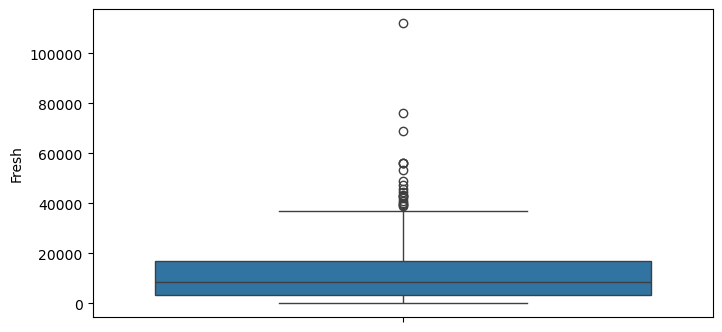

In [84]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Fresh'])
plt.show()

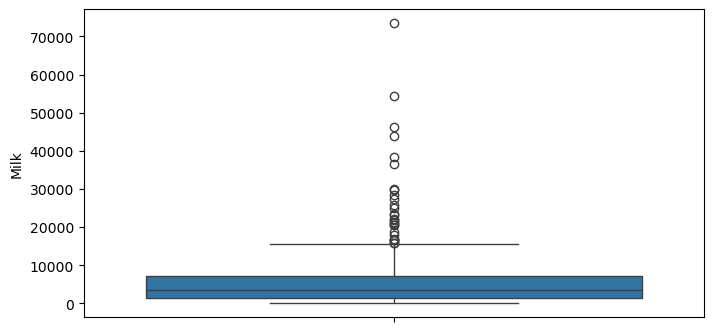

In [86]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Milk'])
plt.show()

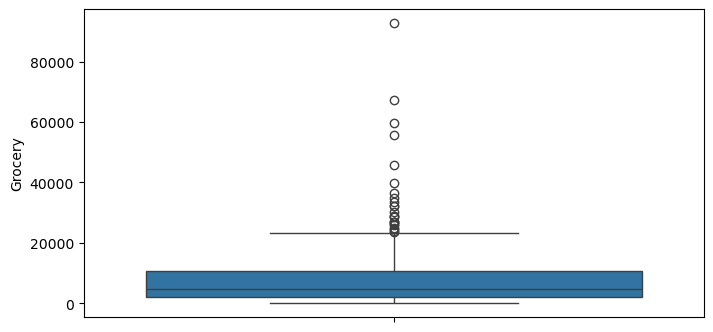

In [88]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Grocery'])
plt.show()

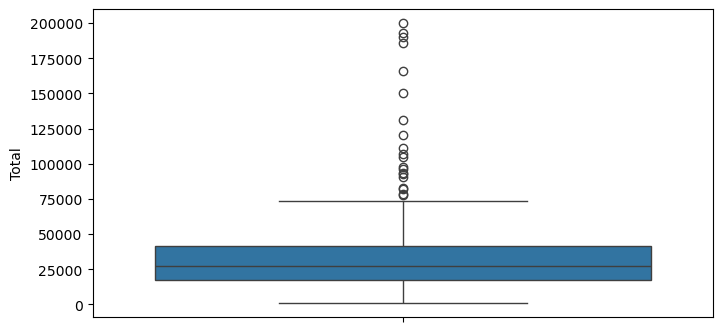

In [90]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Total'])
plt.show()

Outliers

In [98]:
#IQR=Q3(75 percentile)-Q1(25 percentile), IQR range is used to get the data of outliers

In [104]:
iqr=16933.75-3127.75
iqr

13806.0

In [106]:
lower_bound=3127.75-1.5*iqr
lower_bound

-17581.25

In [108]:
upper_bound=16933.75+1.5*iqr
upper_bound

37642.75

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [9]:
data.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
